In [28]:
# import all the essentail modules 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [29]:
# load the dataset 
df  = pd.read_csv("780-testing-2.csv")

In [30]:
# get the first five data 
df.head()

,Target,fblk,nblk,anchor_exact_keyword,anchor_keyword,pa_score,ref_dom,outb_dom,mon_visits,keywords_ranked_on,...,h3kw,alt,altkw,linkin,linkout,urllen,urlkw,txtlen,txtkw,domain_age
0,High SEO,466,957,451,948,79,403,10,1.600000e+07,5000000,...,0,5,1,136,14,90,1,2175,55,23
1,High SEO,60000,10500,40702,44594,98,5300,123,6.700000e+09,327000000,...,1,8,1,1723,642,43,1,7626,137,0
2,High SEO,1800,2400,634,1493,62,805,35,3.900000e+06,191000,...,1,23,9,828,74,57,1,2591,217,8
3,High SEO,968,1300,589,1300,85,466,1,3.310000e+07,5800000,...,0,3,0,62,5,45,1,1318,41,36
4,High SEO,3700,1000,254,761,70,492,6,2.470000e+07,2900000,...,7,48,4,139,49,54,1,2045,103,33


In [31]:
# show the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Target                780 non-null    object 
 1   fblk                  780 non-null    int64  
 2   nblk                  780 non-null    int64  
 3   anchor_exact_keyword  780 non-null    int64  
 4   anchor_keyword        780 non-null    int64  
 5   pa_score              780 non-null    int64  
 6   ref_dom               780 non-null    int64  
 7   outb_dom              780 non-null    int64  
 8   mon_visits            779 non-null    float64
 9   keywords_ranked_on    780 non-null    int64  
 10  cwvm                  778 non-null    float64
 11  cwvd                  778 non-null    float64
 12  mf                    780 non-null    object 
 13  ssl                   780 non-null    object 
 14  si                    780 non-null    object 
 15  Tlen                  7

In [32]:
#check for the duplicate entries 
df[df.duplicated()]

,Target,fblk,nblk,anchor_exact_keyword,anchor_keyword,pa_score,ref_dom,outb_dom,mon_visits,keywords_ranked_on,...,h3kw,alt,altkw,linkin,linkout,urllen,urlkw,txtlen,txtkw,domain_age


In [33]:
#check for the nan value or missing value 
df.isna().sum()

Target                  0
fblk                    0
nblk                    0
anchor_exact_keyword    0
anchor_keyword          0
pa_score                0
ref_dom                 0
outb_dom                0
mon_visits              1
keywords_ranked_on      0
cwvm                    2
cwvd                    2
mf                      0
ssl                     0
si                      0
Tlen                    0
Tkw                     0
Mlen                    0
Mkw                     0
h1                      0
h1len                   0
h1kw                    0
h2                      0
h2len                   0
h2kw                    0
h3                      0
h3len                   0
h3kw                    0
alt                     0
altkw                   0
linkin                  0
linkout                 0
urllen                  0
urlkw                   0
txtlen                  0
txtkw                   0
domain_age              0
dtype: int64

In [34]:
# drop the nan value field 
df.dropna(axis=0,inplace=True)

In [35]:
df.shape

(777, 37)

In [36]:
#describe the dataset 
df.describe()

,fblk,nblk,anchor_exact_keyword,anchor_keyword,pa_score,ref_dom,outb_dom,mon_visits,keywords_ranked_on,cwvm,...,h3kw,alt,altkw,linkin,linkout,urllen,urlkw,txtlen,txtkw,domain_age
count,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,777.000000,777.000000,777.000000,7.770000e+02,7.770000e+02,777.000000,...,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,1.401759e+06,1.964168e+05,5.009802e+04,2.595397e+05,62.486486,2332.388674,167.886744,1.451195e+09,2.178143e+07,52.047619,...,1.646075,15.990991,1.530245,198.903475,42.120978,59.966538,0.903475,1822.056628,39.250965,15.875161
std,2.045403e+07,3.108159e+06,7.845900e+05,3.810143e+06,23.887357,12611.022894,1553.415362,1.042096e+10,7.516840e+07,24.906248,...,3.323935,27.870765,3.909007,286.008533,73.325312,23.587989,1.613315,2324.902019,66.685309,11.485361
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.600000e+01,1.900000e+01,0.000000e+00,1.300000e+01,50.000000,25.000000,0.000000,3.060000e+05,6.970000e+04,33.000000,...,0.000000,3.000000,0.000000,57.000000,11.000000,44.000000,1.000000,494.000000,10.000000,6.000000
50%,2.170000e+02,1.690000e+02,9.000000e+00,1.420000e+02,66.000000,129.000000,5.000000,4.600000e+06,7.840000e+05,51.000000,...,0.000000,8.000000,0.000000,122.000000,20.000000,57.000000,1.000000,1214.000000,23.000000,15.000000
75%,2.500000e+03,1.100000e+03,1.320000e+02,1.428000e+03,80.000000,636.000000,12.000000,3.920000e+07,4.200000e+06,71.000000,...,2.000000,18.000000,1.000000,228.000000,43.000000,73.000000,1.000000,2256.000000,45.000000,25.000000
max,4.290000e+08,7.940000e+07,1.959504e+07,9.992539e+07,100.000000,241000.000000,33500.000000,1.130000e+11,3.980000e+08,100.000000,...,37.000000,351.000000,57.000000,3681.000000,642.000000,182.000000,44.000000,33550.000000,1001.000000,53.000000


In [37]:
df.shape

(777, 37)

In [38]:
# get the non-numeric fields 
cols_str = df.select_dtypes(include=['object']).columns

In [39]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [40]:
#initalize the LabelEncoder 
le = LabelEncoder()

In [41]:
#encode the string
for col in cols_str:
    df[col] = le.fit_transform(df[col])



In [42]:
le.classes_

array(['0', 'No', 'Yes'], dtype=object)

In [43]:
# correlation matrix 
corr_matrix = df.corr()
print(corr_matrix)

                        Target      fblk      nblk  anchor_exact_keyword  \
Target                1.000000 -0.001405 -0.039846             -0.077920   
fblk                 -0.001405  1.000000  0.634007              0.613235   
nblk                 -0.039846  0.634007  1.000000              0.927568   
anchor_exact_keyword -0.077920  0.613235  0.927568              1.000000   
anchor_keyword       -0.061889  0.682650  0.931877              0.937636   
pa_score             -0.264358  0.001690  0.029534              0.051670   
ref_dom              -0.108227  0.584087  0.831396              0.830466   
outb_dom             -0.034805  0.390792  0.596682              0.671715   
mon_visits            0.043489 -0.008923 -0.008213             -0.000066   
keywords_ranked_on   -0.155606 -0.015632 -0.015324              0.039966   
cwvm                 -0.096796  0.055464  0.032266              0.060262   
cwvd                 -0.044329  0.050673  0.024989              0.051047   
mf          

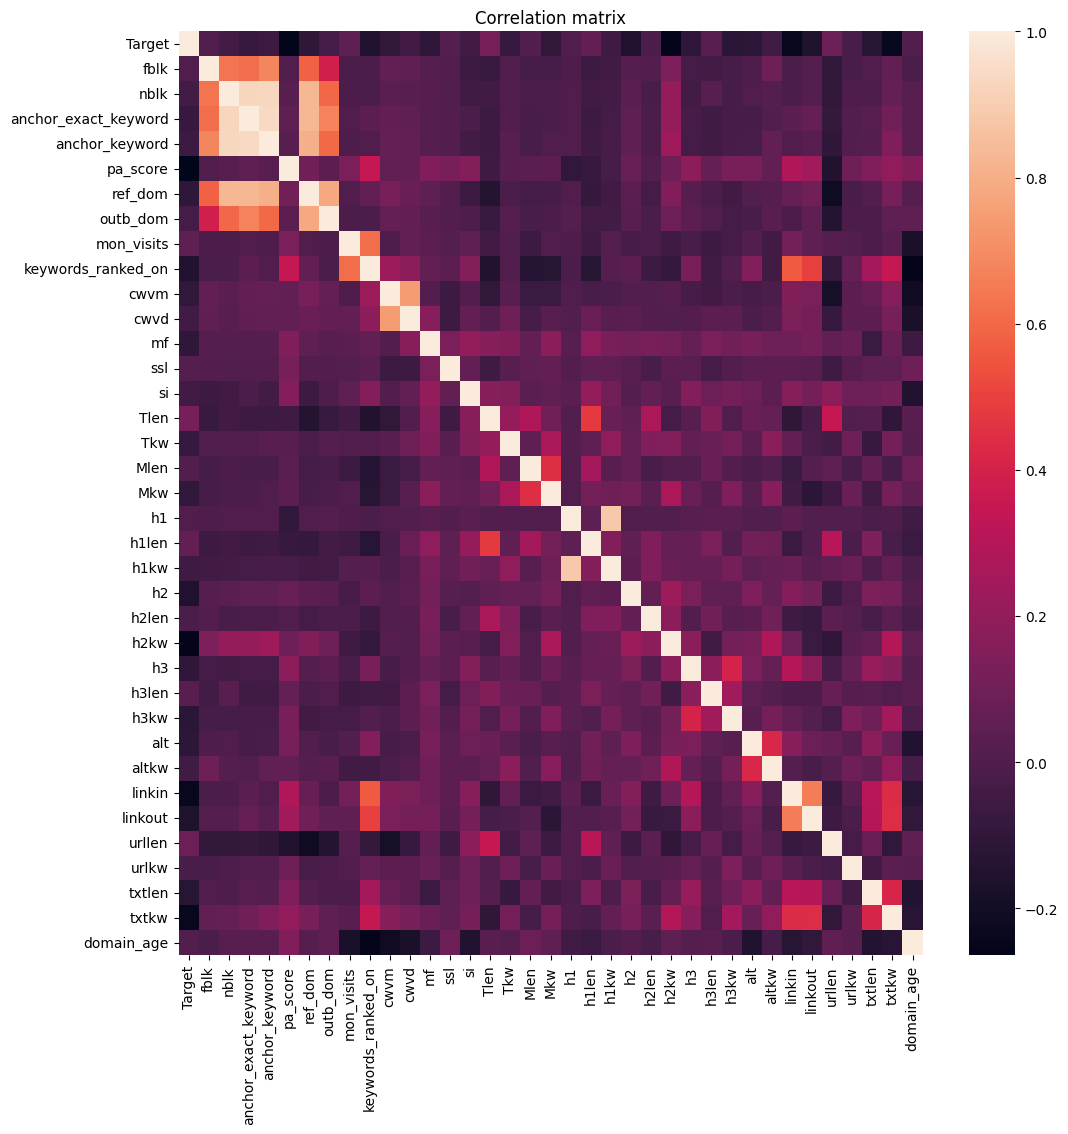

In [44]:
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix)
plt.title("Correlation matrix")
plt.show()

In [45]:
# initalize the MinMaxScaler 
minMaxScaler = MinMaxScaler()

In [46]:
#now check for the outliers 
q1 = df.quantile(q=0.25)
q3 = df.quantile(q=0.75)
iqr = q3-q1

In [47]:
# calc the cut off value 
cutoff_low = q1-(1.5*iqr)
cutoff_high = q3 + (1.5*iqr)

In [48]:
cutoff_high,cutoff_low

(Target                         5.0
 fblk                        6211.0
 nblk                        2721.5
 anchor_exact_keyword         330.0
 anchor_keyword              3550.5
 pa_score                     125.0
 ref_dom                     1552.5
 outb_dom                      30.0
 mon_visits              97541000.0
 keywords_ranked_on      10395450.0
 cwvm                         128.0
 cwvd                         140.0
 mf                             1.0
 ssl                            1.0
 si                             3.5
 Tlen                         111.5
 Tkw                            1.0
 Mlen                         344.0
 Mkw                            5.0
 h1                             1.0
 h1len                         83.5
 h1kw                           1.0
 h2                            27.0
 h2len                         57.5
 h2kw                           7.5
 h3                            32.0
 h3len                         62.0
 h3kw                       

In [49]:
# mask for filtering the dataset 
mask = (df>=cutoff_low)  & (df<=cutoff_high)

In [50]:
# filter_data = df[mask.all(axis=1)]  # remove the outliers 
filter_data= df

In [51]:
filter_data.shape

(777, 37)

In [52]:
filter_data.shape
df = filter_data

In [53]:
# normalize the features 
cols = df.columns 
features_cols = cols.drop('Target')
target,features = df['Target'],df[features_cols]
# normalize_feature = minMaxScaler.fit_transform(features)

In [54]:
# features_df = pd.DataFrame(normalize_feature,columns=features_cols)
target_df = pd.DataFrame(target,columns=['Target'])
new_df = pd.DataFrame.join(target_df,features)
new_df.to_csv("prepared_data.csv")